# Python正则表达式

方便帮助检查一个字符串是否和某种模式匹配

#### re.match（pattern，string，flags=0）

尝试从某个字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，就返回None,匹配成功则返回对象

> - pattern 匹配的正则表达式
> - string 匹配的字符串
> - flags 标志位，用于控制正则表达式的匹配方式，如：是否区分大小写，多行匹配，[查看-->](https://www.runoob.com/python/python-reg-expressions.html#flags)


看成两个步骤，一个是根据Patter 找到这个str，

第二步是取出来指定的值，有括号则按照括号规则取值，没有则只是作为一个规则
 

In [2]:
import re
print(re.match('www', 'www.runoob.com'))  # 在起始位置匹配
print(re.match('com', 'www.runoob.com')) 

<re.Match object; span=(0, 3), match='www'>
None


In [48]:
ob = re.match('(.)are','mare') ##能 ##(是把里面的元素再取出来 放到group中)

In [49]:
ob.group(0)

'mare'

In [51]:
ob.group(1)

'm'

In [42]:
re.match('.are','wmare') ## 不能，因为多了一个

In [76]:
re.match('(.*)are','wmare') ## 又能了

<re.Match object; span=(0, 5), match='wmare'>

In [79]:
re.match('(.*)are','ffarewmaressareff') ##多个are

<re.Match object; span=(0, 15), match='ffarewmaressare'>

In [80]:
re.match('(.*?)are','ffarewmaressareff')  ##一个

<re.Match object; span=(0, 5), match='ffare'>

In [92]:
line = "Cats are smarter than dogs \n fadfa are fadfa"

matchObj = re.match( '(.*) are (.*?) .*', line)  ##re.I参数


if matchObj:
    print(matchObj.group()) ##整体
    print(matchObj.group(1))  ##第一个括号
    print(matchObj.group(2))
#    print(matchObj.group(3))

matchObj

Cats are smarter than dogs 
Cats
smarter


<re.Match object; span=(0, 27), match='Cats are smarter than dogs '>

In [93]:
line = "Cats are smarter than dogs \n fadfa are fadfa"

matchObj = re.match( '.* are (.*?) .*', line)  ##和上面右括号的区别是（）里面匹配到的不会拿到group中


if matchObj:
    print(matchObj.group())  ##x
    print(matchObj.group(1))
    print(matchObj.group(2))
#    print(matchObj.group(3))

matchObj

Cats are smarter than dogs 
smarter


IndexError: no such group

In [22]:
print(line)

Cats are smarter than dogs 
 fadfa are fadfa


### re.search

#### re.match与re.search的区别

re.match只匹配字符串的开始，如果字符串开始不符合正则表达式，则匹配失败，函数返回None；

而re.search匹配整个字符串，直到找到一个匹配。

In [96]:
import re
 
line = "Cats are smarter than dogs";
 
matchObj = re.match( 'dogs', line)
if matchObj:
    print ("match --> matchObj.group() : ", matchObj.group())
else:
    print ("No match!!")
    
    
searchObj = re.search( '(.*)dogs', line)  ##要的是括号里的
if searchObj:
    print ("search --> searchObj.group() : ", searchObj.group())
else:
    print ("No match!!")

No match!!
search --> searchObj.group() :  Cats are smarter than dogs


In [97]:
searchObj  

<re.Match object; span=(0, 26), match='Cats are smarter than dogs'>

In [98]:
searchObj.group(0)

'Cats are smarter than dogs'

---------

## 检索和替换

Python 的 re 模块提供了re.sub用于替换字符串中的匹配项。

re.sub(pattern, repl, string, count=0, flags=0)

> -   pattern : 正则中的模式字符串。

> -    repl : 替换的字符串，也可为一个函数。
    
> -    string : 要被查找替换的原始字符串。
    
> -    count : 模式匹配后替换的最大次数，默认 0 表示替换所有的匹配。

In [117]:
import re
 
phone = "2004-959-559 # 这是一个国外电话号码"
 
# 删除字符串中的 Python注释 
num = re.sub(r'#.*$', "", phone) ## ""里面放什么
print ("电话号码是: ", num)
 
# 删除非数字(-)的字符串 
num = re.sub(r'\D', "", phone)
print ("电话号码是 : ", num)

电话号码是:  2004-959-559 
电话号码是 :  2004959559


-----------------

## findall

在字符串中找到正则表达式所匹配的所有子串，并返回一个列表，如果没有找到匹配的，则返回空列表。

> 注意： match 和 search 是匹配一次 findall 匹配所有。

语法格式为：

findall(pattern, string, flags=0)

参数：



In [131]:
regular_v3 = re.findall(r"(.*)html$","https://docs.python.org/3/whatsnew/3.6.html  fdadahtml")
print (regular_v3)
# ['html']

['https://docs.python.org/3/whatsnew/3.6.html  fdada']


In [138]:
regular_v3 = re.findall(r"(.*?)html$","https://docs.python.org/3/whatsnew/3.6.html \n fdadahtml",re.M)
print (regular_v3)
# ['html']

[' fdada']


In [137]:
regular_v3 = re.findall(r"(.*?)html$","https://docs.python.org/3/whatsnew/3.6.html\n fdadahtml",re.M)
print (regular_v3)
# ['html']

['https://docs.python.org/3/whatsnew/3.6.', ' fdada']


-------------

## Re.findall 和 Re.search的区别

In [210]:
line = "Cats are smarter than dogs \nfadfa are fadfa"

search = re.search( '.* are (.*?) .*', line)  ##和上面右括号的区别是（）里面匹配到的不会拿到group中

findall1 = re.findall( '.* are .*? ', line)

findall2 = re.findall( '(.*?) are (.*?)', line)

In [211]:
print(line)

Cats are smarter than dogs 
fadfa are fadfa


In [212]:
search

<re.Match object; span=(0, 27), match='Cats are smarter than dogs '>

In [213]:
findall1

['Cats are smarter ']

In [214]:
findall2

[('Cats', ''), ('fadfa', '')]

In [125]:
regular_v3

['html']

In [108]:
'afad'.replace('a','')

'fd'

In [ ]:
''

In [215]:

s="i love you not because of who you are, but because of who i am when i am with you"

content=re.findall(r"\b\w",s)

print (content)

['i', 'l', 'y', 'n', 'b', 'o', 'w', 'y', 'a', 'b', 'b', 'o', 'w', 'i', 'a', 'w', 'i', 'a', 'w', 'y']


In [216]:
s="i love you not because 12sd 34er 56df e4 54434"

content=re.findall(r"\b\d",s)

print (content)

['1', '3', '5', '5']


In [218]:
s="i love you not because\n12sd 34er 56\ndf e4 54434 $$$"

content=re.findall(r"\w+",s,re.M)

print (content)

['i', 'love', 'you', 'not', 'because', '12sd', '34er', '56', 'df', 'e4', '54434']


In [219]:
searchObj.groupdict

<function Match.groupdict(default=None)>

In [58]:
searchObj

<re.Match object; span=(22, 26), match='dogs'>

In [1]:
import re

In [3]:
a = ['adfasfasakljaldj131fdaklfajkla4444fadfa5555','daafasda19512345678']
re.findall('\d',a[0])

['1', '3', '1', '4', '4', '4', '4', '5', '5', '5', '5']

In [36]:
searchob = re.search('\d9\d{2}',a[1])#  ## 匹配里面含有一部分  

In [37]:
searchob.group()

'a1951'

In [66]:
import requests
url = 'https://movie.douban.com/top250'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'}
res = requests.get(url,headers=headers)

In [67]:
res.status_code

200

In [69]:
a = res.text

In [70]:
a

'<!DOCTYPE html>\n<html lang="zh-CN" class="ua-windows ua-webkit">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n豆瓣电影 Top 250\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">\n    <link href="https://img3.doubanio.com/f/shire/859dba5cddc7ed1435808cf5a8ddde5792cd6e0c/css/douban.css" rel="stylesheet" type="text/css">\n    <link href="https://img3.doubanio.com/f/shire/db02bd3a4c78de56425ddeedd748a6804af60ee9/css/separation/_all.css" rel="style

In [77]:
def is_chinese(strs):
    for char in strs:
        if not '\u4e00' <= char <= '\u9fa5':
            return False
        return True

In [80]:
name = []
for i in re.findall('<span class="title">(.*?)</span>\n',a):
    if (is_chinese(i)):
        name.append(i)

In [88]:
len(re.findall('&nbsp;主演: (.*?) ',a))

23

In [87]:
len(re.findall('导演: (.*?) .*',a))

25

In [89]:
re.findall('<span class="rating_num" property="v:average">(.*?)</span>\n',a)

['9.7',
 '9.6',
 '9.5',
 '9.4',
 '9.4',
 '9.5',
 '9.4',
 '9.5',
 '9.3',
 '9.4',
 '9.3',
 '9.3',
 '9.3',
 '9.2',
 '9.3',
 '9.3',
 '9.2',
 '9.3',
 '9.2',
 '9.2',
 '9.3',
 '9.2',
 '9.1',
 '9.1',
 '9.2']

In [91]:
url = 'https://m.lianjia.com/chuzu/bj/zufang/'
lj = requests.get(url)

In [92]:
lj.status_code

200

'<!DOCTYPE html>\n<html lang="zh">\n<head>\n  <meta charset="UTF-8">\n  <meta name="apple-mobile-web-app-title" content="租房">\n  <meta name="apple-mobile-web-app-capable" content="yes">\n  <meta name="apple-mobile-web-app-status-bar-style" content="black" />\n  <meta name="format-detection" content="telephone=no">\n  <meta name="viewport" content="initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover">\n  <meta name="applicable-device" content="mobile">\n  <meta http-equiv="cleartype" content="on">\n  <meta http-equiv="Cache-Control" content="no-transform " />\n    <!-- dns预解析 -->\n  <meta http-equiv="x-dns-prefetch-control" content="on" />\n  <link rel="dns-prefetch" href="//s1.ljcdn.com">\n  <link rel="dns-prefetch" href="//ke-image.ljcdn.com">\n  <link rel="dns-prefetch" href="//dig.lianjia.com">\n  <!-- seo相关信息 -->\n  <meta name="description" content="贝壳北京租房网,提供真实的北京租房信息、出租房源信息、租房价格,包括北京整租、合租、公寓出租等信息,以及北京房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来北京贝壳租房!">\n  
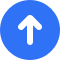

In [94]:
lj.text

In [ ]:
url  https://m.lianjia.com/chuzu/bj/zufang/